In [52]:
import numpy as np 
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import rasterio
import GeoTIFF

In [53]:
MAX_FEATURES = 500 # number of features to detect in each image
GOOD_MATCH_PERCENT = 0.15

In [90]:
# load test raster images
april2 = cv2.imread("data/experimental/aleppo_apr_02/merged_aleppo_20180402.tif", flags=0);
may3 = cv2.imread("data/experimental/aleppo_may_03/aleppo_mergedmat32018.tif");
feb6 = cv2.imread("data/experimental/aleppo_feb_06/aleppo_0206_merged.tif");
full_order = cv2.imread("data/experimental/aleppo_full_order/20180206_073917_0f42_3B_AnalyticMS.tif");

In [55]:
# Convert images to grayscale
#april2_grey = cv2.cvtColor(april2,cv2.COLOR_BGR2GRAY)
may_grey = cv2.cvtColor(may3,cv2.COLOR_BGR2GRAY)
full_order_grey = cv2.cvtColor(full_order,cv2.COLOR_BGR2GRAY)
feb_grey = cv2.cvtColor(feb6,cv2.COLOR_BGR2GRAY)

In [5]:
april2.shape

(3970, 6975)

In [6]:
may3.shape

(3975, 6983, 3)

In [7]:
# creates ORB object
orb = cv2.ORB_create(MAX_FEATURES)

In [8]:
keypoints1, descriptors1 = orb.detectAndCompute(april2, None)
keypoints2, descriptors2 = orb.detectAndCompute(may3, None)
keypoints3, descriptors3 = orb.detectAndCompute(feb6, None)
keypoints4, descriptors4 = orb.detectAndCompute(full_order, None)

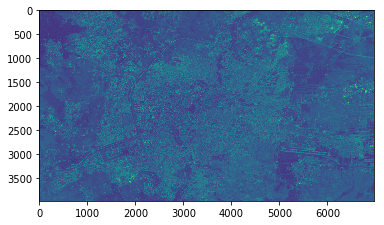

In [39]:
# draw only keypoints location,not size and orientation
# cv2.drawKeypoints(april2,keypoints1,color=(0,255,0), flags=0, outImage=april2)
# plt.imshow(april2),plt.show();

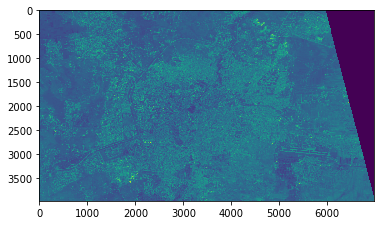

In [9]:
# draw only keypoints location,not size and orientation
# cv2.drawKeypoints(may_grey,keypoints1,color=(0,255,0), flags=0, outImage=may_grey)
# plt.imshow(may_grey),plt.show();

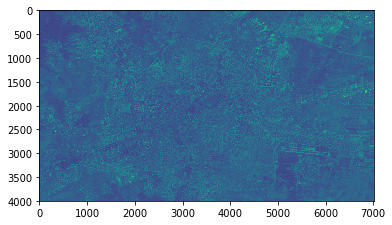

In [10]:
# draw only keypoints location,not size and orientation
cv2.drawKeypoints(feb_grey,keypoints1,color=(0,255,0), flags=0, outImage=feb_grey)
plt.imshow(feb_grey),plt.show();

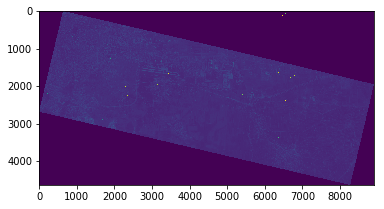

In [41]:
# draw only keypoints location,not size and orientation
cv2.drawKeypoints(full_order_grey,keypoints1,color=(0,255,0), flags=0, outImage=full_order_grey)
plt.imshow(full_order_grey),plt.show();

In [56]:
# Define the motion model
warp_mode = cv2.MOTION_EUCLIDEAN

# Define 2x3 matrix and initialize the matrix to identity
warp_matrix = np.eye(2, 3, dtype=np.float32)

# Specify the number of iterations.
number_of_iterations = 100;
 
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (feb_grey,may_grey,warp_matrix, warp_mode, criteria)


In [57]:
# Find size of image1
size = feb_grey.shape

# Use warpAffine for Translation, Euclidean and Affine
may_aligned = cv2.warpAffine(may_grey, warp_matrix, (size[1],size[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);

In [34]:
type(may_aligned)

numpy.ndarray

In [58]:
# Show final results
cv2.imshow("Image (Feb)", feb_grey)
cv2.imshow("Image (May)", may_grey)
cv2.imshow("Aligned Image 2", may_aligned)


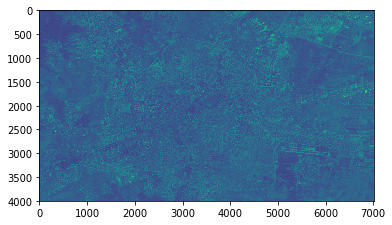

In [59]:
plt.imshow(feb_grey),plt.show();

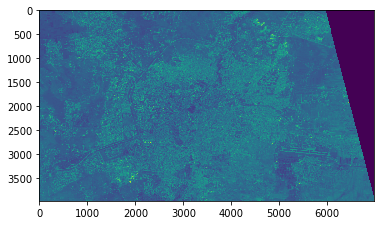

In [60]:
plt.imshow(may_grey),plt.show();

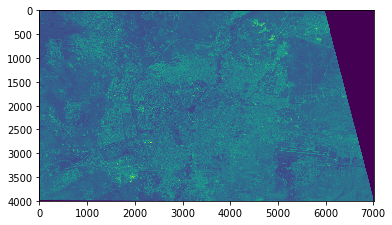

In [61]:
plt.imshow(may_aligned),plt.show();

In [88]:
may_aligned

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [63]:
feb_grey.shape

(3997, 7022)

In [64]:
may_grey.shape

(3975, 6983)

In [65]:
# open image as rasterio file
may_rast = rasterio.open("data/experimental/aleppo_may_03/aleppo_mergedmat32018.tif", "r")
feb_rast = rasterio.open("data/experimental/aleppo_feb_06/aleppo_0206_merged.tif", "r")

In [66]:
may_rast.affine
feb_rast.affine

Affine(3.217138354374885e-05, 0.0, 37.04452514648437,
       0.0, -3.216980269159127e-05, 36.27699287860751)

In [67]:
x, y = may_rast.affine*(100,100)
print(x)
print(y)

37.04776025253111
36.27375809366768


In [68]:
x, y = feb_rast.affine*(100,100)
print(x)
print(y)

37.04774228483874
36.27377589833835


In [116]:
difference = feb_grey - may_aligned

In [84]:
plt.figure(figsize=(25,15));
plt.imshow(difference);
plt.savefig("difference_test1.png");

In [85]:
plt.figure(figsize=(25,15));
plt.imshow(feb_grey);
plt.savefig("feg_grey_test1.png");

In [86]:
plt.figure(figsize=(25,15));
plt.imshow(may_aligned);
plt.savefig("may_aligned_test1.png");

In [87]:
# Try blurring the images
from scipy import ndimage as ndi
from scipy.ndimage import gaussian_filter
from scipy import misc

In [91]:
may3_raster = rasterio.open('data/experimental/aleppo_may_03/aleppo_mergedmat32018.tif')

In [92]:
may3_raster.transform

/Users/kevinsun/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


[37.04452514648437,
 3.2351060467450155e-05,
 0.0,
 36.27699287860751,
 0.0,
 -3.234784939831203e-05]

In [99]:
{i: dtype for i, dtype in zip(may3_raster.indexes, may3_raster.dtypes)}

{1: 'uint16', 2: 'uint16', 3: 'uint16'}

In [102]:
may_aligned = may_aligned.astype('uint16')

In [103]:
# using rasterio
# save aligned image
with rasterio.open('may_aligned.tif', 'w', driver='GTiff', height=may_aligned.shape[0],
                   width=may_aligned.shape[1], count=1, dtype='uint16',
                   crs='+proj=latlong', transform=may3_raster.transform) as dst:
    dst.write(may_aligned, 1)

/Users/kevinsun/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/kevinsun/anaconda3/lib/python3.6/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


In [113]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter
from scipy.misc import imread, imresize, imsave

def find_vector_set(diff_image, new_size):
    
    i = 0
    j = 0
    vector_set = np.zeros((int((new_size[0] * new_size[1]) / 25), 25))
    while i < vector_set.shape[0]:
        while j < new_size[0]:
            k = 0
            while k < new_size[1]:
                block   = diff_image[j:j+5, k:k+5]
                feature = block.ravel()
                print(vector_set.shape)
                print(feature.shape)
                vector_set[i, :] = feature
                k = k + 5
            j = j + 5
        i = i + 1
        
    mean_vec   = np.mean(vector_set, axis = 0)    
    vector_set = vector_set - mean_vec    
    return vector_set, mean_vec
      
def find_FVS(EVS, diff_image, mean_vec, new):
    
    i = 2 
    feature_vector_set = []
    
    while i < new[0] - 2:
        j = 2
        while j < new[1] - 2:
            block = diff_image[i-2:i+3, j-2:j+3]
            feature = block.flatten()
            feature_vector_set.append(feature)
            j = j+1
        i = i+1
        
    FVS = np.dot(feature_vector_set, EVS)
    FVS = FVS - mean_vec
    print("\nfeature vector space size", FVS.shape)
    return FVS

def clustering(FVS, components, new):
    
    kmeans = KMeans(components, verbose = 0)
    kmeans.fit(FVS)
    output = kmeans.predict(FVS)
    count  = Counter(output)

    least_index = min(count, key = count.get)            
    change_map  = np.reshape(output,(new[0] - 4, new[1] - 4))
    return least_index, change_map

   
def find_PCAKmeans(imagepath1, imagepath2):
    
    image1 = cv2.imread(imagepath1)
    image2 = cv2.imread(imagepath2)
    
    new_size = np.asarray(image1.shape) / 5 * 5
    for num in new_size:
        num = int(num)
        
    image1 = imresize(image1, (new_size)).astype(np.int16)
    image2 = imresize(image2, (new_size)).astype(np.int16)
    
    diff_image = abs(image1 - image2)   
    imsave('diff.jpg', diff_image)
        
    vector_set, mean_vec = find_vector_set(diff_image, new_size)
    pca     = PCA()
    pca.fit(vector_set)
    EVS = pca.components_
        
    FVS     = find_FVS(EVS, diff_image, mean_vec, new_size)
    components = 3
    least_index, change_map = clustering(FVS, components, new_size)
    
    change_map[change_map == least_index] = 255
    change_map[change_map != 255] = 0
    
    change_map = change_map.astype(np.uint8)
    kernel     = np.asarray(((0,0,1,0,0),
                             (0,1,1,1,0),
                             (1,1,1,1,1),
                             (0,1,1,1,0),
                             (0,0,1,0,0)), dtype=np.uint8)
    cleanChangeMap = cv2.erode(change_map,kernel)
    imsave("changemap.jpg", change_map)
    imsave("cleanchangemap.jpg", cleanChangeMap)
    
a = 'data/experimental/aleppo_feb_06/aleppo_0206_merged.tif'
b = 'may_aligned.tif'
find_PCAKmeans(a,b)

(1122677, 25)
(75,)


ValueError: could not broadcast input array from shape (75) into shape (25)